<a href="https://colab.research.google.com/github/jasmineA20/psychic-broccoli/blob/main/prox_dos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FileNotFoundError: ignored

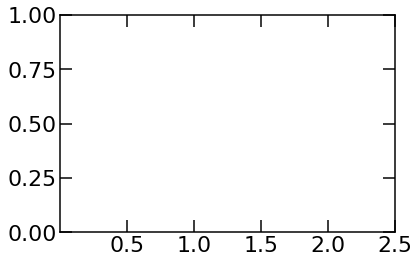

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import csv

#Formatting
matplotlib.rcParams['axes.linewidth']=1.5
plt.tick_params(which='both', direction='in', length=12, width=1.5, right=True, top=True, labelsize=22)
plt.tick_params(which='minor',length=5)
plt.xticks([0.5,1.0,1.5,2.0,2.5])
#plt.minorticks_on()

#Import CSVs
datahigh = [[],[]]
with open("./high.csv") as high:
    rdr = csv.reader(high, delimiter=',')
    for row in rdr:
        datahigh[0].append(float(row[0]))
        datahigh[1].append(float(row[1]))
datalow = [[],[]]
with open("./low.csv") as low:
    rdr = csv.reader(low, delimiter=',')
    for row in rdr:
        datalow[0].append(float(row[0]))
        datalow[1].append(float(row[1]))

#Fit parameters
DeltaS = 1.38
DeltaN = 0.69
Rhigh=0.085
Rlow=0.025
k = 0.08617
dl = 0.001
T = 1.5

#Define Functions used in Proximity Model DOS
def Omega(e,Delta):
    return np.sqrt(e**2-Delta**2+0j)

def F(e):
    return (e**2 - DeltaS*DeltaN)/(Omega(e,DeltaN)*Omega(e,DeltaS))

def G(e):
    return e*(DeltaS-DeltaN)/(Omega(e,DeltaN)*Omega(e,DeltaS))

def DKd(e,dl,R):
    return R*Omega(e,DeltaN)+dl*1j

def sigma(e,dl,R):
    return np.imag( ((e/Omega(e,DeltaN))*( F(e)*np.cos(DKd(e,dl,R))*1j + np.sin(DKd(e,dl,R)) )+1j*G(e)*DeltaN/Omega(e,DeltaN))/(np.cos(DKd(e,dl,R)) - F(e)*np.sin(DKd(e,dl,R))*1j) )

#BCS DOS
def N(e,Delta):
    return e/np.sqrt(e**2-Delta**2+0j)

#Fermi-Dirac Distribution
def f(e):
    return 1/(np.exp(-e/(k*T))+1)

def fp(e):
    return -1*(1/(k*T))*np.exp(-e/(k*T))/((1+np.exp(-e/(k*T)))**2)

def intgnd(e,v,dl,R):
    return np.abs(sigma(e,dl,R))*(-fp(e-v))

def bcsintgnd(e,v,Delta):
    return np.abs(N(e,Delta))*(-fp(e-v))

xmin = 0.5
xmax = 2.5

vr = np.linspace(xmin,xmax,100)#200
didvr = [[],[],[]]
cutoff=5
for v in vr:
    didvr[0].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,Rhigh),limit=100)[0])
    didvr[1].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,Rlow),limit=100)[0])
    #didvr[2].append(quad(bcsintgnd,DeltaS,v+cutoff,args=(v,DeltaS),limit=100)[0])

plt.figure(1)

plt.axis([xmin,xmax,0,2.3])
plt.xlabel("Voltage (mV)",fontsize=28)
plt.ylabel("Normalized Conductance (A.U.)",fontsize=28)
plt.plot(vr,didvr[0],color="black",linewidth=3)
plt.plot(vr,didvr[1],color="black",linewidth=3)
#plt.plot(vr,didvr[2],color="blue",linewidth=3)
plt.scatter(datahigh[0],datahigh[1],color='black',s=70,facecolors='red')
plt.scatter(datalow[0],datalow[1],color='black',s=70,facecolors='blue')
plt.text(0.62,1.42,"$\Delta_{S}$="+str(DeltaS)+" meV\n$\Delta_{N}$="+str(DeltaN)+" meV\n$\\frac{d}{l}$="+str(dl)+"\n$R_{high}$="+str(Rhigh)+"\n$R_{low}$="+str(Rlow),fontsize=26,linespacing=1.6)
plt.tick_params(axis='y',pad=10)
plt.tick_params(axis='x',pad=10)

#a = plt.axes([.53,.16,.34,.34],facecolor='#ededed')
#a.set_xticks([0.5,1.5,2.5])
#a.set_yticks([0.0,1.0,2.0])
#a.set_xlim([0.5,2.5])
#a.set_ylim([0,2.3])
#a.tick_params(which='both', direction='in', length=12, width=1.5, right=True, top=True, labelsize=20,pad=8)
#plt.scatter(datahigh[0][22:100],datahigh[1][22:100],color='black',s=50,facecolors='red')
#plt.plot(vr,didvr[2],color="black",linewidth=3)

fig = plt.gcf()
fig.set_size_inches((10,10))
#fig.savefig('./latest.pdf',dpi=300)
plt.show()

